In [1]:
#Importing all relevant libraries

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

from tqdm import tqdm


In [2]:
#Reading using pandas
train_df = pd.read_csv('emnist-balanced-train.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.shape

(112800, 785)

We have 112800 rows (images), each described using 784 variables 28X28 pixels plus one column as output variable (the first column)



### Creating label dictionary

The output variables' values comprise of 0 to 46 values where 0-9 stands for 0-9 numbers, 10-35 stands for uppercase A-Z and 35+ stand for lowercase alphabets. We will thus create a dictionary which will have these as key and value pairs.

In our dataset, there is a file emnist-balanced-mapping which contains the characters and their ASCII equivalents. We can have the index column as the key of the dictionary and the value ASCII code converted to char as the value of the dictionary.

In [6]:
#Reading the file
label_map = pd.read_csv("emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
label_map.head()

<ipython-input-6-807c5be3b3b4>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  label_map = pd.read_csv("emnist-balanced-mapping.txt",


0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [7]:
#Initialising an empty dictionary
label_dictionary = {}

#Running a loop for ASCII equivalent to character conversion
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

My area of interst is only the Hand Writing Recognition of Numbers and Block letters. Thus dropping the lowercase characters from the dataset.

In [8]:
#train_df[~train_df[0].isin(np.arange(36, 47))]
train_df_new = train_df[train_df[0].isin(np.arange(0, 36))]
train_df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Checking
train_df_new[0].describe()

count    86400.000000
mean        17.500000
std         10.388355
min          0.000000
25%          8.750000
50%         17.500000
75%         26.250000
max         35.000000
Name: 0, dtype: float64

min value is 0 and max value is 35. Thus, only numbers and uppercase characters are there in the new dataframe.

We will next split this output variable (y) from the input variables (x)

In [10]:
# Resetting Index
train_df_new.reset_index(inplace=True)
train_df_new

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train = train_df_new.loc[:, 1:]
y_train = train_df_new.loc[:, 0]

x_train.shape, y_train.shape

((86400, 784), (86400,))

### Visualising Sample data

In [12]:
# Sample entry number 1000
sample_image = x_train.iloc[1000]
sample_label = y_train.iloc[1000]
sample_image.shape, sample_label

((784,), 19)

Label entry No. 1000: J


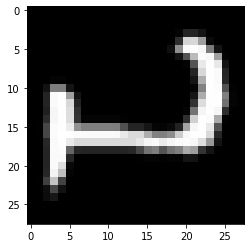

In [13]:
#Init Height and Weight
W = 28
H = 28

print("Label entry No. 1000:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()

It is quite visible that the image is rotated anticlockwise 90 degrees and flipped as well. We will thus define a function to rotate and flip and see if it works on the sample image.

Label entry 1000: J


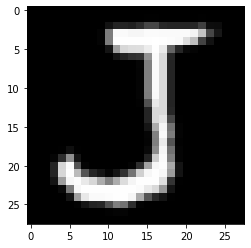

In [14]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 1000:", label_dictionary[sample_label])
plt.imshow(flip_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

Next we want to apply reshape_and_rotate to all images in X_train

In [15]:
x_train = np.apply_along_axis(flip_and_rotate, 1, x_train.values)
x_train.shape

(86400, 28, 28)

### Visualising More Samples

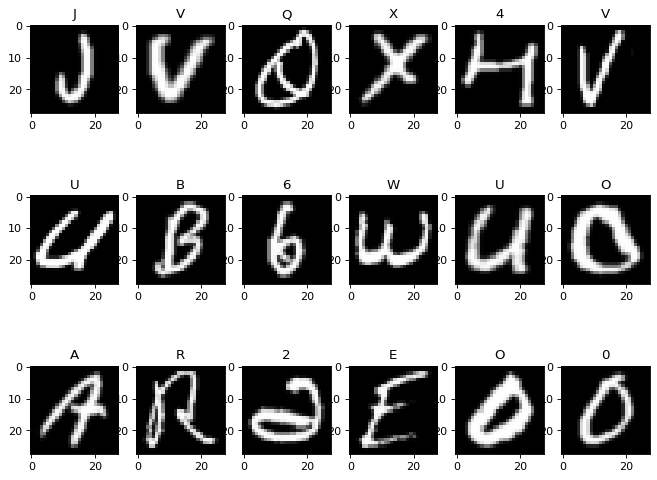

In [16]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_train[i]])

### Normalizing the Data

In [17]:
#Data Scaling to bring the input values between 0 to 1
x_train = x_train.astype('float32') / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.03529412, 0.1254902 ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1333

### One Hot Encoding of the Output Labels

As the output values are integers, from 0 to 35, we must perform one hot encoding so as to get a number of output columns comprised of 0 and 1 class labels.

In [18]:
#Finding the number of output columns
number_of_classes = y_train.nunique()
number_of_classes

36

In [19]:
#One hot encoding of numpy array
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_train.shape

(86400, 36)

### Reshaping the train data

As tensorflow requires 4D Array, (batch X width X height X channel) and our x_train is 3D array (no. of images X width X height), we will be adding one more dimension to the x_train

In [20]:
x_train.shape

(86400, 28, 28)

In [21]:
x_train = x_train.reshape(-1, W, H, 1)
x_train.shape

(86400, 28, 28, 1)

### Train and Validation Split

We will be dividing the input dataset into train and validation in the ratio of 90:10 for Model Building

In [22]:
# Split 10% validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size= 0.1, 
                                                  random_state=88)

### Model Building

In [23]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(W, H, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [24]:
# Optimizing Algorithm for Backpropagation

optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [25]:
#Model Fitting

history = model.fit(x_train,
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/30
2187/2187 [==============================] - ETA: 0s - loss: 0.5501 - accuracy: 0.8180
Epoch 1: val_loss improved from inf to 0.33751, saving model to my_model.h5
2187/2187 [==============================] - 94s 42ms/step - loss: 0.5501 - accuracy: 0.8180 - val_loss: 0.3375 - val_accuracy: 0.8744
Epoch 2/30
2187/2187 [==============================] - ETA: 0s - loss: 0.2810 - accuracy: 0.8951
Epoch 2: val_loss improved from 0.33751 to 0.28880, saving model to my_model.h5
2187/2187 [==============================] - 84s 39ms/step - loss: 0.2810 - accuracy: 0.8951 - val_loss: 0.2888 - val_accuracy: 0.8909
Epoch 3/30
2186/2187 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9077
Epoch 3: val_loss improved from 0.28880 to 0.27121, saving model to my_model.h5
2187/2187 [==============================] - 87s 40ms/step - loss: 0.2387 - accuracy: 0.9077 - val_loss: 0.2712 - val_accuracy: 0.8979
Epoch 4/30
2186/2187 [============================>.] - ETA: 0s -

### Plotting Accuracy and Loss

In [28]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

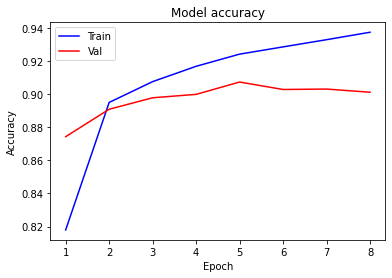

In [29]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

Loss Curve


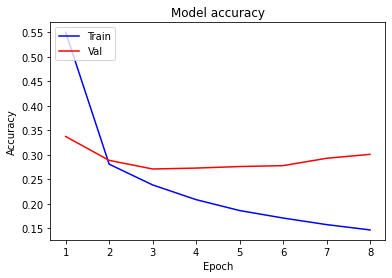

In [30]:
# loss curve
print('Loss Curve')
plotgraph(epochs, loss, val_loss)


In [31]:
# Load best model
# model = load_model('/kaggle/working/my_model.h5')
# model.summary()

### Prediction on the Validation Data

In [32]:
# Storing all the predicted values in y_pred variable
y_pred = model.predict(x_val)
# Finding shape
y_pred.shape

270/270 [==============================] - 3s 10ms/step


(8640, 36)

### Visualizing some predicted values

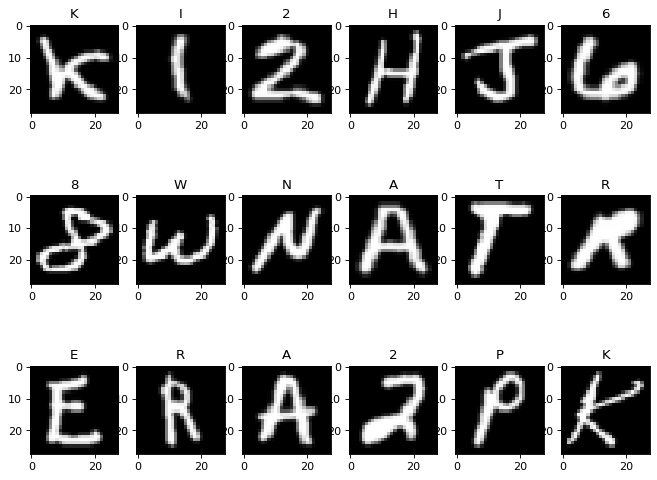

In [33]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(x_val[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

### Validation Accuracy

In [34]:
val_acc = model.evaluate(x_val, y_val)
print('Loss value is ',val_acc[0])
print('Accuracy value is ',val_acc[1])

270/270 [==============================] - 3s 11ms/step - loss: 0.2754 - accuracy: 0.9102
Loss value is  0.2753988802433014
Accuracy value is  0.9101851582527161


### Predicting the test data that came along with the dataset

In [37]:
#Loading the dataset
test_df = pd.read_csv('emnist-balanced-test.csv', header=None)
test_df.shape

(18800, 785)

In [38]:
#Removing lowercase entries
test_df_new = test_df[test_df[0].isin(np.arange(0, 36))]
test_df_new.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,14400.000000,14400.0,14400.0,14400.0,14400.0,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,...,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0
mean,17.500000,0.0,0.0,0.0,0.0,0.007917,0.025764,0.014722,0.012222,0.014722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,10.388655,0.0,0.0,0.0,0.0,0.604236,2.012452,1.204803,1.019562,1.733652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8.750000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,17.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,26.250000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,35.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#Splitting into x and y
x_test = test_df_new.loc[:, 1:]
y_test = test_df_new.loc[:, 0]

x_test.shape, y_test.shape

((14400, 784), (14400,))

In [40]:
#Flipinng and rotating
x_test = np.apply_along_axis(flip_and_rotate, 1, x_test.values)
y_test = np_utils.to_categorical(y_test, number_of_classes)

x_test.shape, y_test.shape

((14400, 28, 28), (14400, 36))

In [41]:
#Normalisation
x_test = x_test.astype('float32') / 255

In [42]:
#Reshaping (Changing Dimension)
x_test = x_test.reshape(-1, W, H, 1)
x_test.shape

(14400, 28, 28, 1)

In [43]:
#Evaluating Model
test_acc = model.evaluate(x_test, y_test)
print('Loss value is ',test_acc[0])
print('Accuracy value is ',test_acc[1])

450/450 [==============================] - 5s 10ms/step - loss: 0.2905 - accuracy: 0.9079
Loss value is  0.2905391752719879
Accuracy value is  0.9079166650772095


In [56]:
x_test[0].resha

(28, 28, 1)

In [57]:
type(x_test[0])

numpy.ndarray

In [59]:
model.predict(x_test[0].reshape((1, 28, 28, 1)))

1/1 [==============================] - 0s 35ms/step


array([[1.36454704e-13, 3.48069959e-17, 1.80874926e-16, 8.29946705e-16,
        3.23411301e-13, 3.90031892e-13, 2.61048623e-17, 3.10327718e-13,
        2.11807863e-11, 1.00000000e+00, 8.95788213e-18, 4.41462447e-18,
        2.72802419e-16, 2.80698406e-18, 1.03453315e-16, 4.59040493e-14,
        1.77403488e-13, 2.08488935e-20, 2.50171554e-23, 3.75176896e-15,
        1.08323753e-26, 8.86225077e-15, 2.96406483e-18, 1.18242626e-22,
        2.65271978e-16, 6.92347240e-15, 6.68113438e-12, 7.65803498e-22,
        5.26045644e-14, 3.79546861e-17, 7.21544802e-20, 1.17331641e-18,
        1.02552632e-18, 4.30945913e-21, 4.19598634e-10, 2.16350148e-16]],
      dtype=float32)

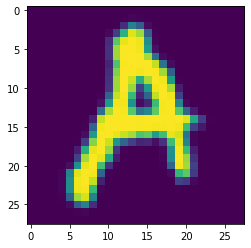

1/1 [==============================] - 0s 50ms/step
A


In [96]:
num=2023

plt.imshow(x_test[num])
plt.show()
y_pred=model.predict(x_test[num].reshape(1, 28, 28, 1))
print(label_dictionary[y_pred.argmax()])

In [49]:
#Prediction
y_pred_test = model.predict(x_test)
# Finding shape
y_pred_test.shape

450/450 [==============================] - 3s 6ms/step


(14400, 36)

In [67]:
y_pred_test[0]

array([1.36454961e-13, 3.48069959e-17, 1.80875614e-16, 8.29949881e-16,
       3.23411924e-13, 3.90031892e-13, 2.61048623e-17, 3.10328315e-13,
       2.11808678e-11, 1.00000000e+00, 8.95788213e-18, 4.41464142e-18,
       2.72802419e-16, 2.80699460e-18, 1.03453315e-16, 4.59040493e-14,
       1.77403827e-13, 2.08488935e-20, 2.50171554e-23, 3.75176896e-15,
       1.08324161e-26, 8.86228465e-15, 2.96406483e-18, 1.18243522e-22,
       2.65272984e-16, 6.92347240e-15, 6.68114739e-12, 7.65806426e-22,
       5.26047643e-14, 3.79546861e-17, 7.21544802e-20, 1.17332085e-18,
       1.02553418e-18, 4.30947528e-21, 4.19599439e-10, 2.16351802e-16],
      dtype=float32)

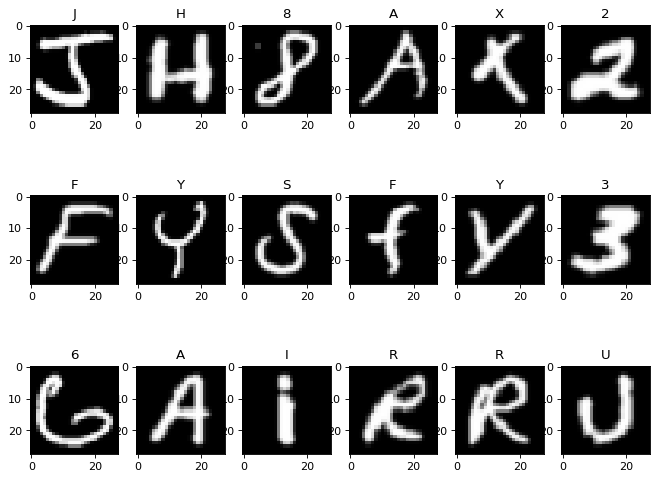

In [45]:
# Visualising some predicted values

plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred_test[i].argmax()])

In [61]:
model = load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [62]:
import pickle

In [64]:
pickle.dump(model, open('pblModel.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-19 22:40:55         4305
metad